Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/incomplete.9EGBEX_0.2.0/yelp_polarity_reviews-train.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/incomplete.9EGBEX_0.2.0/yelp_polarity_reviews-test.t…

Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0. Subsequent calls will reuse this data.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 70s 32ms/step - accuracy: 0.8729 - loss: 0.2829 - val_accuracy: 0.9430 - val_loss: 0.1474
Epoch 2/3
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.9531 - loss: 0.1275 - val_accuracy: 0.9482 - val_loss: 0.1410
Epoch 3/3
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.9638 - loss: 0.1014 - val_accuracy: 0.9481 - val_loss: 0.1352


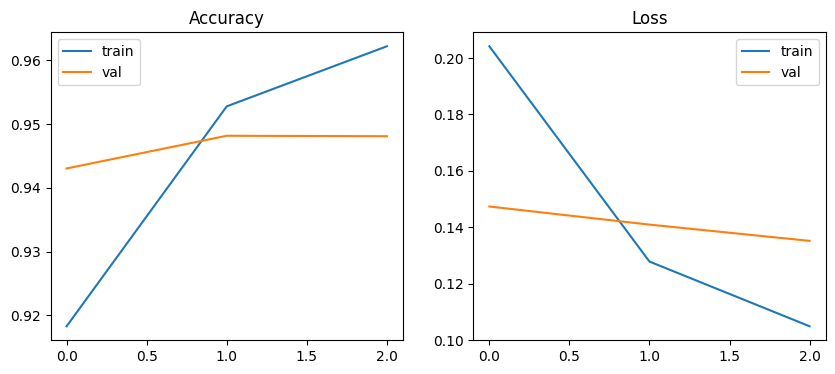

1188/1188 - 9s - 8ms/step - accuracy: 0.9507 - loss: 0.1310
Test loss: 0.1310  |  Test accuracy: 0.9507
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step

Text: This place had amazing food and great service!
Score: 0.9979  →  Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Text: Worst experience ever. I will never go back.
Score: 0.0000  →  Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Text: The food was okay but the service was pretty slow.
Score: 0.0168  →  Negative


In [1]:
# ---------------------------
# LSTM on Yelp Polarity (Colab-ready)
# ---------------------------
!pip install -q tensorflow-datasets   # run this line in Colab once

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (as supervised pairs)
ds_train, ds_test = tfds.load('yelp_polarity_reviews', split=['train','test'], as_supervised=True)

# Extract texts and labels into Python lists (works for teaching-sized runs)
train_texts = []
train_labels = []
for text, label in tfds.as_numpy(ds_train):
    train_texts.append(text.decode('utf-8'))
    train_labels.append(int(label))

test_texts = []
test_labels = []
for text, label in tfds.as_numpy(ds_test):
    test_texts.append(text.decode('utf-8'))
    test_labels.append(int(label))

# Tokenization
VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)

MAXLEN = 200
X_train = tokenizer.texts_to_sequences(train_texts)
X_train = pad_sequences(X_train, maxlen=MAXLEN, padding='post', truncating='post')

X_test = tokenizer.texts_to_sequences(test_texts)
X_test = pad_sequences(X_test, maxlen=MAXLEN, padding='post', truncating='post')

y_train = np.array(train_labels)
y_test  = np.array(test_labels)

# Build model
model = models.Sequential([
    layers.Embedding(VOCAB_SIZE, 128, input_length=MAXLEN),
    layers.Bidirectional(layers.LSTM(64, return_sequences=False)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train (for speed, use fewer epochs; increase if you have time)
history = model.fit(X_train, y_train,
                    epochs=3,
                    batch_size=256,
                    validation_split=0.1)

# Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss')
plt.legend()
plt.show()

# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test loss: {loss:.4f}  |  Test accuracy: {acc:.4f}")

# ---------------------------
# Inference block (predict new text)
# ---------------------------
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=MAXLEN, padding='post', truncating='post')
    score = model.predict(padded)[0][0]
    label = "Positive" if score > 0.5 else "Negative"
    return score, label

samples = [
    "This place had amazing food and great service!",
    "Worst experience ever. I will never go back.",
    "The food was okay but the service was pretty slow."
]

for s in samples:
    sc, lab = predict_sentiment(s)
    print(f"\nText: {s}\nScore: {sc:.4f}  →  {lab}")

# Optional interactive test in Colab:
# while True:
#     txt = input("Enter review (or 'exit'): ")
#     if txt.lower()=='exit': break
#     print(predict_sentiment(txt))
